In [12]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [5]:
data = pd.read_csv("student-mat.csv", sep=";")

In [6]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [8]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [9]:
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

In [33]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

# LINEAR MODEL GOES BY THE ECUATION
# mx + b = y
# m is the slope or linear coeficient
# b is the intercept or the remainder value

In [34]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test) # acc stands for accuracy 
acc

0.9479283385870726

In [38]:
print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

Coefficient: 
 [ 0.15285346  0.98240213 -0.18303387 -0.1970523   0.0350669 ]
Intercept: 
 -1.5497412466332694


In [1]:
import pickle
from matplotlib import style
import matplotlib.pyplot as plt

In [37]:
# SAVE MODEL 
with open('studentmodel.pickle', 'wb') as f:
    pickle.dump(linear, f)
    
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

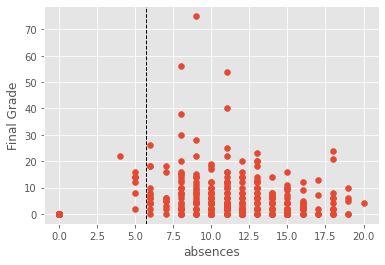

In [79]:
p = 'absences'

plt.plot(data[p].mean(), 0, color = 'red')
style.use("ggplot")
plt.scatter(data['G3'], data[p])
plt.xlabel(p)
plt.ylabel('Final Grade')
plt.axvline(data[p].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()